In [1]:
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

%matplotlib inline

In [2]:
im_list_green=[]

for file in glob.glob("trafficLightImages/total/green/*"): #note that my dataset contains all the data and is split with sklearn
    # the file directory contains all the 
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    im_list_green.append(im)
    
print(len(im_list_green))

536


In [3]:
im_list_red=[]

for file in glob.glob("trafficLightImages/total/red/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    im_list_red.append(im)
    
print(len(im_list_red))

904


In [4]:
im_list_yellow=[]

for file in glob.glob("trafficLightImages/total/yellow/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    im_list_yellow.append(im)
    
print(len(im_list_yellow))

43


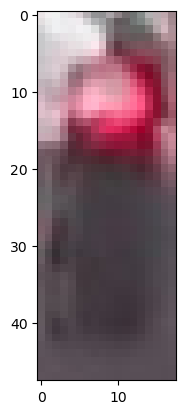

In [5]:
for image in im_list_red:
    plt.imshow(image)
    #plt.show()

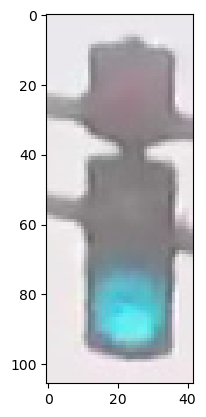

In [6]:
for image in im_list_green:
    plt.imshow(image)
    #plt.show()

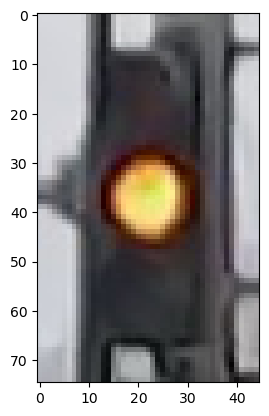

In [7]:
for image in im_list_yellow:
    plt.imshow(image)
    #plt.show()

In [8]:
print(im_list_green[0].shape)
print(len(im_list_green[0]))
print(len(im_list_green[0][1]))
print(len(im_list_green[0][1][2]))
# print("73", im_list_green[0])
# print("46", im_list_green[1])
# print("3", im_list_green[2])

(34, 19, 3)
34
19
3


In [9]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    image_crop = np.copy(image)
    row_crop = 7
    col_crop = 8
    image_crop = image[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
    standard_im = cv2.resize(image_crop, (32, 32))
    return standard_im

In [10]:
 !pip install opencv-python

import cv2 # helper functions

# std_img = standardize_input(im_list_green[2])

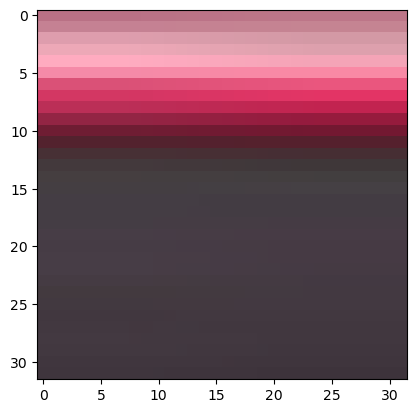

In [11]:
std_img_list_red=[]

for image in im_list_red:
    std_img = standardize_input(image)
    std_img_list_red.append((std_img,0)) # red light is class 0 storing as a tuple.
    plt.imshow(std_img)
    #plt.show()


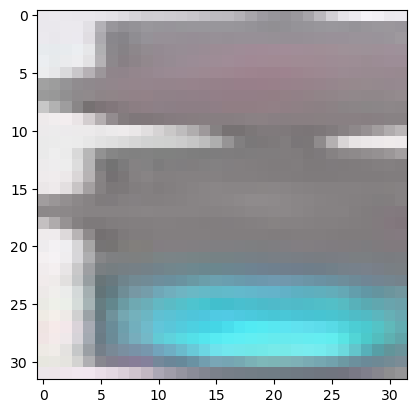

In [12]:
std_img_list_green=[]

for image in im_list_green:
    std_img = standardize_input(image)
    std_img_list_green.append((std_img,1)) # green light is class 1 storing as a tuple.
    plt.imshow(std_img)
    #plt.show()
    

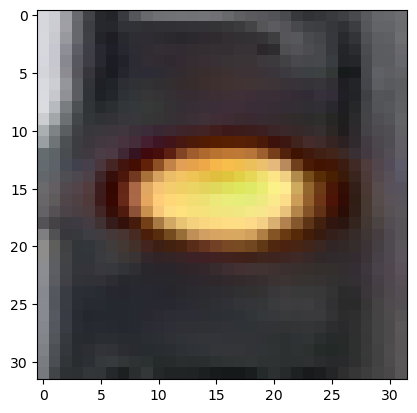

In [13]:
std_img_list_yellow=[]

for image in im_list_yellow:
    std_img = standardize_input(image)
    std_img_list_yellow.append((std_img,2)) # yellow light is class 2 storing as a tuple.
    plt.imshow(std_img)
    #plt.show()
#print(type(image))

In [14]:
# std_img_list_yellow = random.shuffle(std_img_list_yellow)
# std_img_list_red = random.shuffle(std_img_list_red)
# std_img_list_green= random.shuffle(std_img_list_green)

import pandas as pd
from random import shuffle
# std_unity_list = std_img_list_yellow+std_img_list_red+std_img_list_green
# combined_tuples = shuffle(std_unity_list)
# type(std_unity_list)

# std_unity_list = []
# std_unity_list.extend([(img, 0) for img in std_img_list_red])
# std_unity_list.extend([(img, 1) for img in std_img_list_yellow])
# std_unity_list.extend([(img, 2) for img in std_img_list_green])
# shuffle(std_unity_list)



# I tried many different ways, ultimately, I decided to work with a dataframe and then turn back into numpy array later as
# this was most familiar way of working.

# It is worth nothing that creating a dataframe gets slower with more data


def create_dataframe_from_images(image_list):
    flat_images = [np.array(image).flatten() for image, label in image_list] # flattening the images
    labels = [label for image, label in image_list]
    df = pd.DataFrame(flat_images)
    df['Label'] = labels  # Adding the label column
    return df



In [15]:
df_yellow = create_dataframe_from_images(std_img_list_yellow)
df_red = create_dataframe_from_images(std_img_list_red)
df_green = create_dataframe_from_images(std_img_list_green)

# then concat the three different dataframes
combined_df = pd.concat([df_yellow, df_red, df_green])
combined_df

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Label
0,170,171,176,193,194,199,185,187,192,114,...,30,34,35,75,80,81,132,138,138,2
1,143,142,147,144,143,148,146,145,150,148,...,144,140,147,142,137,144,141,136,143,2
2,62,63,68,62,64,69,68,71,77,73,...,68,69,74,64,65,70,63,65,70,2
3,66,74,85,66,74,85,66,74,85,64,...,51,57,69,50,56,68,50,56,68,2
4,138,126,128,138,126,128,138,126,128,138,...,143,131,131,143,131,131,143,131,131,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,132,132,132,129,129,130,124,124,126,124,...,135,133,144,145,141,151,152,146,156,1
532,114,125,131,114,125,131,117,128,134,121,...,62,104,109,64,103,108,64,103,108,1
533,147,139,150,147,139,150,143,136,147,137,...,97,197,185,101,196,184,101,196,184,1
534,101,100,108,101,100,108,101,100,108,101,...,34,232,199,34,232,199,34,232,199,1


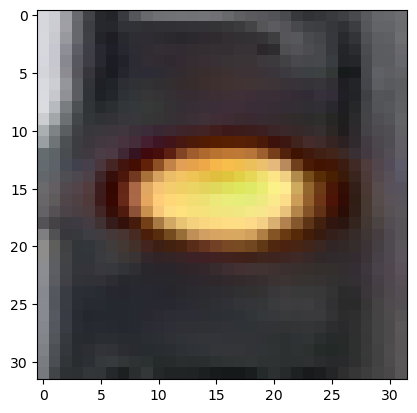

In [16]:
# print(std_img.shape)
plt.imshow(std_img)

In [17]:
#print(std_unity_list[1])

In [18]:
# red_labels = [0] * len(std_img_list_red)
# yellow_labels = [1] * len(std_img_list_yellow)
# green_labels = [2] * len(std_img_list_green)
# labels = red_labels + yellow_labels + green_labels
# #im_list_yellow.append(image,0)
# std_imgs_shuffled, labels = zip(*std_unity_list)
# std_imgs_shuffled = list(std_imgs_shuffled)
# labels = list(labels)

# Tried many ways again.


# Shuffle and apply a random_state for reproducability.


shuffled_df = combined_df.sample(frac=1, random_state=3) 
shuffled_df = shuffled_df.reset_index(drop=True)

X = shuffled_df.drop('Label',axis=1)
y = shuffled_df['Label']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.2, random_state=20, stratify=y) # test_train_split splitting data into 80% for training and 20% for test

In [20]:
#X_validation

# SVM with rbf kernal

In [21]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf') # RBF is stronger for non-linear data, I find it is more powerful.

In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
import numpy as np

# # Flatten each image
# X_flattened = [image.flatten() for image in X_train]
# X_flattened_test = [image.flatten() for image in X_validation]
# # np.array(flatteningCode)
# X_flattened = np.array(X_flattened)
# X_flattened_test = np.array(X_flattened_test)

svm.fit(X_train, y_train) # many iterations, simple without hyperparameters produces the best result.

# X_combined_std = np.vstack((X_train, X_validation))
# y_combined = np.hstack((y_train, y_validation))

SVC()

In [24]:
type(y_train)
#print(y_train)

pandas.core.series.Series

In [25]:
#y_validation

In [26]:
from sklearn import metrics 
y_pred = svm.predict(X_validation)
print(metrics.accuracy_score(y_validation, y_pred))

0.98989898989899


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confmat = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix: \n", confmat)
print("Total Testing Amount: \n",len(y_validation))
# data change!
# I deleted one specific yellow light that was skewing the data, the F1 score for yellow went from 62% to 88%
# This photo had some object below the yellow light with a light green shade, thus skewing the information so I removed it
# and the model was more powerful, perhaps in the real world I cannot do this.

Confusion Matrix: 
 [[181   0   0]
 [  1 106   0]
 [  0   2   7]]
Total Testing Amount: 
 297


In [29]:

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(classification_report(y_validation, y_pred))
confmat = confusion_matrix(y_validation, y_pred)
print(confmat)
print()
print('Accuracy: %.3f' % accuracy_score(y_true=y_validation, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_validation, y_pred=y_pred, average='macro'))
print('Recall: %.3f' % recall_score(y_true=y_validation, y_pred=y_pred, average='macro'))
print('F1: %.3f' % f1_score(y_true=y_validation, y_pred=y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       181
           1       0.98      0.99      0.99       107
           2       1.00      0.78      0.88         9

    accuracy                           0.99       297
   macro avg       0.99      0.92      0.95       297
weighted avg       0.99      0.99      0.99       297

[[181   0   0]
 [  1 106   0]
 [  0   2   7]]

Accuracy: 0.990
Precision: 0.992
Recall: 0.923
F1: 0.953


In [30]:
def cross_entropy(predictions, targets, epsilon=1e-10):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce_loss = -np.sum(targets * np.log(predictions + 1e-5)) / N
    return ce_loss

cross_entropy_loss = cross_entropy(y_pred, y_validation)
print("Cross entropy loss is: " + str(cross_entropy_loss))

Cross entropy loss is: 0.03875985011319883


 ## Analysis of SVM Model:
 
 The primary goal is to have no red light miss-classifications. Red light missclassifcations are the most dangerous when riding in a self driving car. If there is a green light missclassifcation then the car might get honked at, but then the user can interact and have the car continue driving. This SVM model performs exceptionally well, it miss classifies one green light, and has amazing F1 and recall scores as well. Yellow, has the most missclassifications and I am convinced it is because yellow is in between green and red and also the lowest amount of data. This means that in future iterations of this project getting more yellow light data would be a good addtion.
 
The cross entropy loss went from ~ 0.0479 to 0.03875, with the goal having this number as close to 0 (1 menaing all entropic, 0 meaning 0 entropy.) for an accurate number increasing the amount of data produced a more accuarate model. Overall accuracy is 99%.

I tested this off of 297 total images split from the test_train_split module in sklearn.

While this data is linearly seperable, as in, it is possible to draw a line that seperates the lights, the kernal set to RBF is meant for non linear seperable data but I also find it works well with high-dimensionality datasets. Linear results in a 5% lower accuracy.

# CNN w/ tf

In [31]:
from tensorflow import keras
import tensorflow as tf

2024-05-07 23:39:11.767822: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-07 23:39:11.770772: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 23:39:11.811281: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 23:39:11.811758: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 23:39:12.788216: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [32]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 10 # keeping values at default, but changing epochs to 10 because 20 was overfitting.

In [33]:
tf.random.set_seed(3) #SO this is reproducable.

In [34]:

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(3, 3),
    strides=(1, 1), padding='valid',
    input_shape=(32, 32, 3), # the image is 32 x 32 x 3, (3 for RGB)
    name='conv_1', activation='relu')) # the output is smaller because of the operation reuducing dimensions

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), name='pool_1'))

model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(3, 3), # applies 64 filters that are 3x3 in size
    strides=(1, 1), padding='valid', # low stride for maximum reiteration over an image
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')) # reducing the dimension size by half

model.add(tf.keras.layers.Flatten(name='flatten')) # flattens to 1D array 

model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1', # fully connected 2304 values to 1024 neurons.
    activation='relu'))

model.add(tf.keras.layers.Dropout(rate=0.5, name='dropout'))

model.add(tf.keras.layers.Dense(
    units=3, name='fc_2', #  1024 weights connects to 3 output neurons for each class.
    activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 pool_1 (MaxPooling2D)       (None, 15, 15, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 13, 13, 64)        18496     
                                                                 
 pool_2 (MaxPooling2D)       (None, 6, 6, 64)          0         
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 fc_1 (Dense)                (None, 1024)              2360320   
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [35]:
print(X_train.shape)
print(y_train.shape)

(1186, 3072)
(1186,)


In [36]:
X_train = X_train[:len(X_validation)] # makes validation and training the significantly smaller size, this prevents overfitting.
y_train = y_train[:len(y_validation)]

# choice to keep this commented or not. chose not.

/tmp/ipykernel_5055/3990260265.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y_train[:len(y_validation)]


In [37]:

X_validation.shape
X_train.shape #must use -1 to make it None

(297, 3072)

In [38]:
y_validation.shape

(297,)

In [39]:
# X_train = tf.convert_to_tensor(X_train)
# y_train = tf.convert_to_tensor(y_train)
# X_validation = tf.convert_to_tensor(X_validation)
# y_validation = tf.convert_to_tensor(y_validation)

X_train = tf.reshape(X_train, [-1, 32, 32, 3])
X_validation = tf.reshape(X_validation, [-1, 32, 32, 3])
#print(X_train)
#print(X_validation) 


# I needed to reshape after making a dataframe. Before when I was using a list, it was already
# in the right shape.

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(), # using adam instead of gradient descient, Adam performs better
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`


history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_data=(X_validation, y_validation), shuffle=True)

Epoch 1/10
10/10 [==============================] - 2s 83ms/step - loss: 37.3954 - accuracy: 0.6532 - val_loss: 6.9601 - val_accuracy: 0.9259
Epoch 2/10
10/10 [==============================] - 1s 69ms/step - loss: 2.9001 - accuracy: 0.9327 - val_loss: 1.0751 - val_accuracy: 0.8889
Epoch 3/10
10/10 [==============================] - 1s 60ms/step - loss: 0.6639 - accuracy: 0.9596 - val_loss: 0.0104 - val_accuracy: 0.9966
Epoch 4/10
10/10 [==============================] - 1s 66ms/step - loss: 0.0196 - accuracy: 0.9966 - val_loss: 0.0045 - val_accuracy: 0.9966
Epoch 5/10
10/10 [==============================] - 1s 66ms/step - loss: 0.0071 - accuracy: 0.9966 - val_loss: 5.8867e-06 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 1s 66ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 5.7558e-05 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 1s 67ms/step - loss: 0.0028 - accuracy: 0.9966 - val_loss: 0.0377 - val_accuracy: 0.9933
Epoc

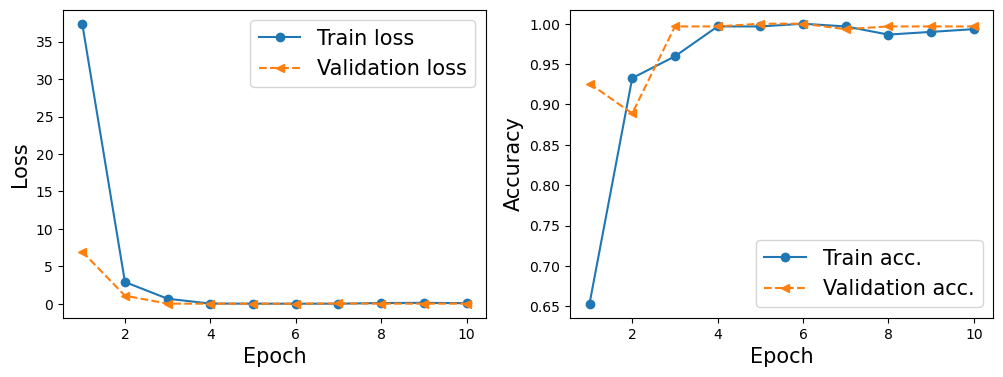

{'loss': [37.395355224609375, 2.900130033493042, 0.6638873815536499, 0.01957440935075283, 0.0071216728538274765, 0.0019705521408468485, 0.0027611125260591507, 0.09102573245763779, 0.12084575742483139, 0.07210040092468262], 'accuracy': [0.6531986594200134, 0.932659924030304, 0.9595959782600403, 0.996632993221283, 0.996632993221283, 1.0, 0.996632993221283, 0.9865319728851318, 0.9898989796638489, 0.9932659864425659], 'val_loss': [6.960052967071533, 1.0750709772109985, 0.010373292490839958, 0.004469525534659624, 5.886681265110383e-06, 5.755755410064012e-05, 0.037708815187215805, 0.008421743288636208, 0.007425329182296991, 0.015381223522126675], 'val_accuracy': [0.9259259104728699, 0.8888888955116272, 0.996632993221283, 0.996632993221283, 1.0, 1.0, 0.9932659864425659, 0.996632993221283, 0.996632993221283, 0.996632993221283]}


In [41]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)


plt.show()
print(hist)

This is showing that the model learns really well right away with the loss being 29, it is common for losses
to be a higher number then even out.

In [42]:
print(type(history))
print(type(hist))


<class 'keras.callbacks.History'>
<class 'dict'>


In [43]:
print(model)

In [44]:
test_results = model.evaluate(X_validation,y_validation,batch_size=10)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

30/30 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 0.9966

Test Acc. 99.66%


In [45]:
predictions_prob = model.predict(X_validation)
predictions = np.argmax(predictions_prob, axis=1)

10/10 [==============================] - 0s 5ms/step


In [46]:
conf_matrix = confusion_matrix(y_validation, predictions)
conf_matrix

array([[181,   0,   0],
       [  1, 106,   0],
       [  0,   0,   9]])

# Analysis of CNN Model:
This model performs better than the SVM model because it only miss classified yellowlights(probably because of the least amount of data), which I would say is better than 
missclassifying greenlights. The accuracy shoots up after about 5 epochs but takes the remaining 5 epochs to even out.
\
The accuracy of 99.66% is extremly high and it is what I would expect for a problem like this with the amount of parameters (2.3 million). Each parameter is an updating weight or connection to each node, this is exciting considering the cutting edge AI tech of today have upwards of around 70 billion parameters in their LLMs.

If I were to further improve this I would try to gather more diverse photos with more blue backgrounds(sky), to further generalize however with this quantity of training around 1000 photos and for around 300 testing images this is rather generalized. I found it interesting to change the architecture of the neural network and seeing the results with 32 versus 64 filters, or 
manipulating the strides, I think 1,1 works best because of the amounts of times that it iterates over the same data. Using the 13x13 portion of the photo also I finds works well, as it covers about a little less than half of the photo and probably the 3 layers of color (RGB) shows the majority of the difference.